### Import dataset 

In [191]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv
import datetime
from pmdarima import auto_arima

from statsmodels.tools.eval_measures import rmse


import warnings
warnings.filterwarnings('ignore')

In [2]:
series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [3]:
data= series.loc['Z8RsBpxhnkebK5fvahVCmfV7icO2']

In [4]:
data

,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
uid,,,,,,,,,,,,,,
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:15:00,72.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:30:00,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 00:45:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 01:00:00,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2019-12-16 01:15:00,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,102.35376,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-23 21:15:00,NaN,NaN,NaN,NaN,NaN,NaN,102.76200,NaN,NaN,NaN,NaN,NaN,NaN
Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-23 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,108.47736,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data =data.reset_index()
data = data[['sugarValue', 'time']]
data['time']=pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data.set_index(['time'], inplace=True)




In [6]:
dataSugar = data.dropna()
dataSugar = dataSugar.drop(dataSugar[dataSugar.sugarValue > 300].index, inplace=False)

### Plot the original data

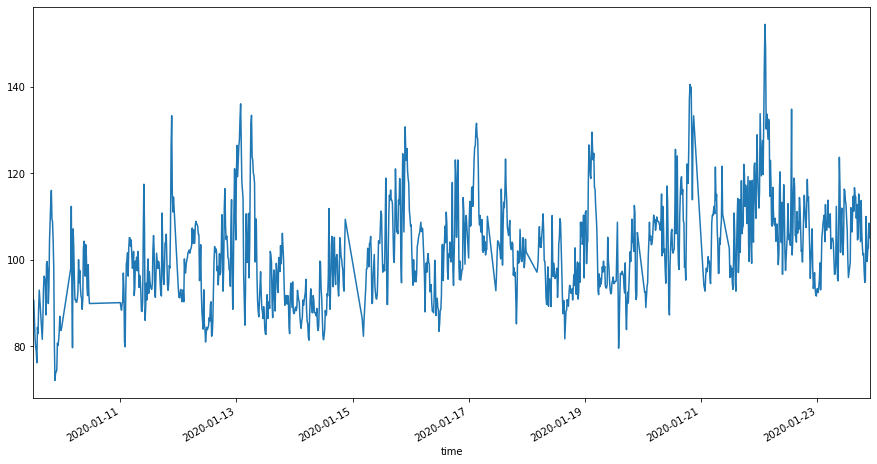

In [7]:
#visualize the data
ax = dataSugar['sugarValue'].plot(figsize=(15,8))



### Look the seasonal decompose

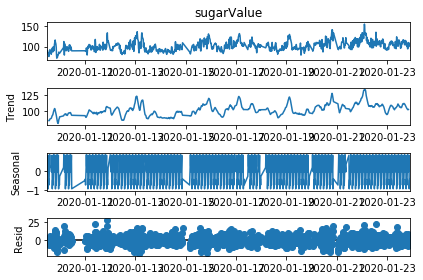

In [8]:
seasonal_decompose(dataSugar['sugarValue'], freq=12).plot();

### Auto Arima evaluation for chose a model 

In [11]:
#find arima model
results = auto_arima(dataSugar['sugarValue'], seasonal=True, m=12, trace = True)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 12) (constant=True); AIC=7767.161, BIC=7807.922, Time=3.481 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=7936.036, BIC=7946.226, Time=0.021 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=7937.733, BIC=7958.114, Time=0.411 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=7936.597, BIC=7956.977, Time=0.457 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=7934.040, BIC=7939.135, Time=0.014 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 1, 12) (constant=True); AIC=7766.425, BIC=7802.090, Time=1.203 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 12) (constant=True); AIC=7770.206, BIC=7800.776, Time=0.386 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 2, 12) (constant=True); AIC=7767.161, BIC=7807.922, Time=4.530 seconds
Fit ARIMA: (2, 1, 2)x(1, 0, 0, 12) (constant=True); AIC=7766.050, BIC=7801.715, Time=1.421 seconds
Fit ARIMA: (2, 1, 2)x(2, 0, 0, 12) (constant=True); AIC=7767.160,

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1207
Model:             SARIMAX(0, 1, 3)x(1, 0, [], 12)   Log Likelihood               -3875.813
Date:                             Wed, 11 Mar 2020   AIC                           7763.626
Time:                                     12:23:35   BIC                           7794.196
Sample:                                          0   HQIC                          7775.138
                                            - 1207                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.081      0.190      0.849      -0.144       0.175
ma.L1         -0.0689      0.024     -2.872      0.004      -0.116      -0.022
ma.L2         -0.3880      0.022    -17.293      0.000      -0.432      -0.344
ma.L3         -0.0808      0.027     -3.011      0.003      -0.133      -0.028
ar.S.L12      -0.0763      0.029     -2.662      0.008      -0.132      -0.020
sigma2        36.2086      1.101     32.883      0.000      34.050      38.367
===================================================================================
Ljung-Box (Q):                       53.18   Jarque-Bera (JB):               211.63
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 ## Time series analysis and cross-validation with slide-window.

Backtest Machine Learning Models

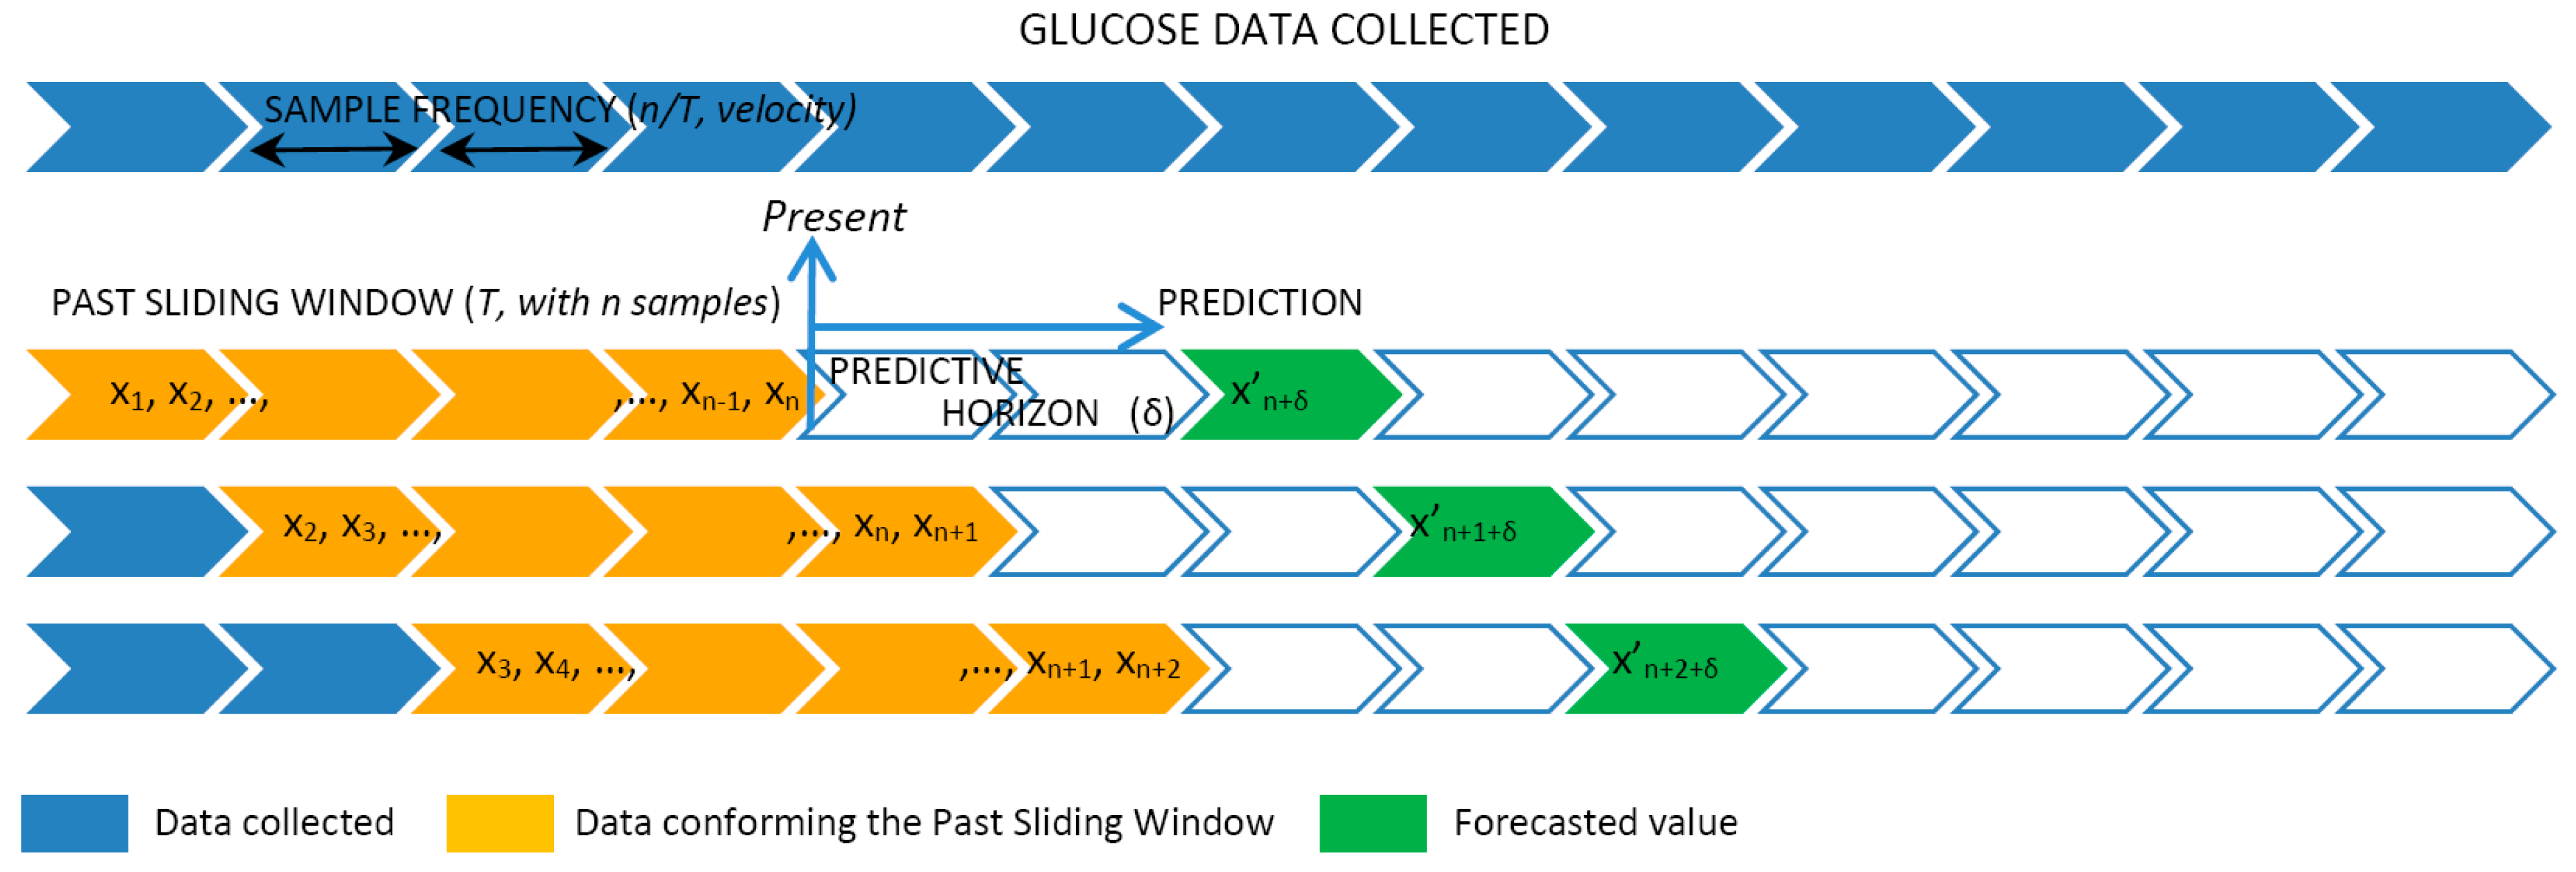

## Create a window, compute a prediction and calculate the MAE and RMSE for each window. Save the value in a dataset. 

### The dataset will show :

#### - Current train (the current window values) 
#### - Current test (the predicted values)
#### - MSE the average of the forecast error values
#### - RMSE (root mean square error)



In [ ]:
n=12 ##3h
v=1  # 15 min
df = dataSugar
start_time = time.time()

window2 = pd.DataFrame(columns=['Current train', 'Current test', 'MSE'])

for x in range((len(df)-n-v)):
   
    train = df.iloc[x:n]
    test = df.iloc[n:n+v]

#indces for the train test split
    start = len(train)
    end = start + len(test)-1

    model = SARIMAX(df['sugarValue'], order=(0, 1, 3), seasonal_order=(0, 0, 0, 12), enforce_invertibility=False).fit()
    pred = model.predict(n, n+v-1)
    n += 1
    
    #print("Current train value: ",train)
    #print("Current  test value: ",test)
    #print("Predicted value: ",pred)
    #print("MAE : ",np.square(np.subtract(test['sugarValue'] , pred)).mean() )

    window2 = window2.append({'Current train': "From: "+str(train.index[0]) +" to: " + str(train.index[-1]) , 
                            'Current test':"From: "+str(test.index[0]) +" to: " + str(test.index[-1]), 
                            'MSE': np.square(np.subtract(test['sugarValue'] , pred)).mean(),
                            'RMSE': rmse(test['sugarValue'], pred) },ignore_index=True)
    
    
    
print("--- %s Seconds for computation ---" % (time.time() - start_time))


In [51]:
n=12 ##3h
v=2  # 15min and 30 min
df = dataSugar
start_time = time.time()

window2 = pd.DataFrame(columns=['Current train', 'Current test', 'MSE'])

for x in range((len(df)-n-v)):
   
    train = df.iloc[x:n]
    test = df.iloc[n:n+v]

#indces for the train test split
    start = len(train)
    end = start + len(test)-1

    model = SARIMAX(df['sugarValue'], order=(0, 1, 3), seasonal_order=(0, 0, 0, 12), enforce_invertibility=False).fit()
    pred = model.predict(n, n+v-1)
    n += 1
    
    #print("Current train value: ",train)
    #print("Current  test value: ",test)
    #print("Predicted value: ",pred)
    #print("MAE : ",np.square(np.subtract(test['sugarValue'] , pred)).mean() )

    window2 = window2.append({'Current train': "From: "+str(train.index[0]) +" to: " + str(train.index[-1]) , 
                            'Current test':"From: "+str(test.index[0]) +" to: " + str(test.index[-1]), 
                            'MSE': np.square(np.subtract(test['sugarValue'] , pred)).mean(),
                            'RMSE': rmse(test['sugarValue'], pred) },ignore_index=True)
    
    
    
print("--- %s Seconds for computation ---" % (time.time() - start_time))

--- 161.03608989715576 Seconds for computation ---


In [52]:
n=12 ##3h
v=3  # 15min, 30 min and 45 min
df = dataSugar
start_time = time.time()

window3 = pd.DataFrame(columns=['Current train', 'Current test', 'MSE'])

for x in range((len(df)-n-v)):
   
    train = df.iloc[x:n]
    test = df.iloc[n:n+v]

#indces for the train test split
    start = len(train)
    end = start + len(test)-1

    model = SARIMAX(df['sugarValue'], order=(0, 1, 3), seasonal_order=(0, 0, 0, 12), enforce_invertibility=False).fit()
    pred = model.predict(n, n+v-1)
    n += 1
    
    #print("Current train value: ",train)
    #print("Current  test value: ",test)
    #print("Predicted value: ",pred)
    #print("MAE : ",np.square(np.subtract(test['sugarValue'] , pred)).mean() )

    window3 = window3.append({'Current train': "From: "+str(train.index[0]) +" to: " + str(train.index[-1]) , 
                            'Current test':"From: "+str(test.index[0]) +" to: " + str(test.index[-1]), 
                            'MSE': np.square(np.subtract(test['sugarValue'] , pred)).mean(),
                            'RMSE': rmse(test['sugarValue'], pred) },ignore_index=True)
    
    
    
print("--- %s Seconds for computation ---" % (time.time() - start_time))

--- 167.0564181804657 Seconds for computation ---


In [53]:
n=12 ##3h
v=4  # 15, 30, 45, 60 min
df = dataSugar
start_time = time.time()

window4 = pd.DataFrame(columns=['Current train', 'Current test', 'MSE'])

for x in range((len(df)-n-v)):
   
    train = df.iloc[x:n]
    test = df.iloc[n:n+v]

#indces for the train test split
    start = len(train)
    end = start + len(test)-1

    model = SARIMAX(df['sugarValue'], order=(0, 1, 3), seasonal_order=(0, 0, 0, 12), enforce_invertibility=False).fit()
    pred = model.predict(n, n+v-1)
    n += 1
    
    #print("Current train value: ",train)
    #print("Current  test value: ",test)
    #print("Predicted value: ",pred)
    #print("MAE : ",np.square(np.subtract(test['sugarValue'] , pred)).mean() )

    window4 = window4.append({'Current train': "From: "+str(train.index[0]) +" to: " + str(train.index[-1]) , 
                            'Current test':"From: "+str(test.index[0]) +" to: " + str(test.index[-1]), 
                            'MSE': np.square(np.subtract(test['sugarValue'] , pred)).mean(),
                            'RMSE': rmse(test['sugarValue'], pred) },ignore_index=True)
    
    
    
print("--- %s Seconds for computation ---" % (time.time() - start_time))

--- 159.77708792686462 Seconds for computation ---


## Join a vales in a dataset

In [188]:
d = {'RMSE': window["RMSE"], 'Interval': ["15 Min"]*len(window["RMSE"])}
df = pd.DataFrame(data=d)

d2 = {'RMSE': window2["RMSE"], 'Interval': ["30 Min"]*len(window2["RMSE"])}
df2 = pd.DataFrame(data=d2)

d3 = {'RMSE': window3["RMSE"], 'Interval': ["45 Min"]*len(window3["RMSE"])}
df3 = pd.DataFrame(data=d3)

d4 = {'RMSE': window4["RMSE"], 'Interval': ["60 Min"]*len(window4["RMSE"])}
df4 = pd.DataFrame(data=d4)

df= df.append(df2).append(df3).append(df4)
              

## Plot the RMSE in a boxplot

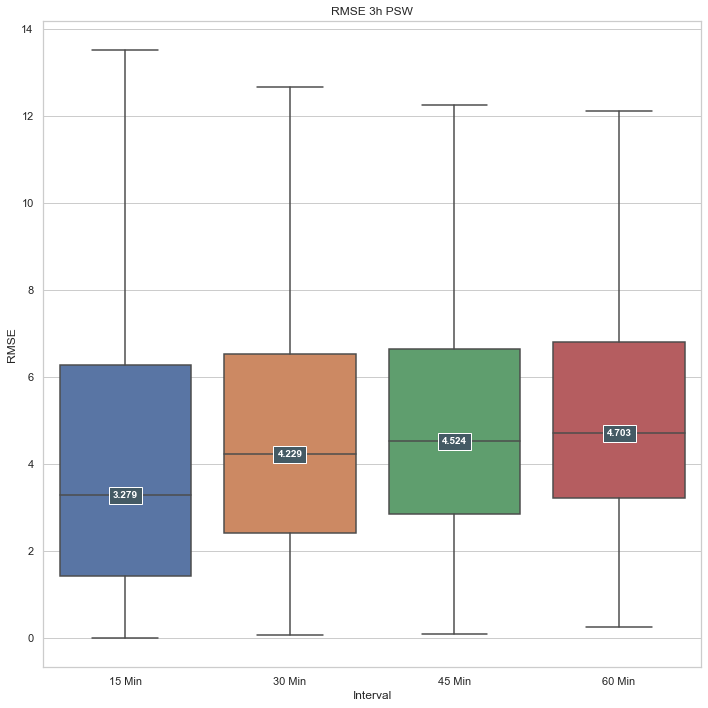

In [192]:
box_plot_data=[window["RMSE"],window2["RMSE"],window3["RMSE"],window4["RMSE"]]

plt.figure(figsize=(10, 10))
plt.title("RMSE 3h PSW")
plt.ylabel("RMSE")
plt.xlabel("")


box_plot = sns.boxplot(x="Interval" ,y="RMSE" ,data=df, showfliers = False)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*5].get_ydata()[0],3) 
    
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    

box_plot.figure.tight_layout()


